# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Conservation of engery applied to the system
* There is no energy generation in the control volume

The control volume is the external surface of the pipe surface area $A=\pi D\cdot L=2.5m^2$. The energy is transfered from the from the pipe surface area throught the insulation to the outside through conduction. Conservation of energy is applied to the system, thus:

$$
\dot{E}_{in}-\dot{E}_{out}=0
$$

with $\dot{E}_{in}=q_{loss}$ and $\dot{E}_{out}=q_{cond}$ where

$$
q_{cond}=q''_{cond}\cdot A
$$

$$
q_{cond}=-k\cdot A\cdot\frac{T_{pipe}-T_{amb}}{L_{insulation}}
$$

Thus,

$$
q_{loss}=-k\cdot A\cdot\frac{T_{amb}-T_{pipe}}{L_{insulation}}
$$

The thermal conductivity of the insultaion found online is $k=0.23$. Excel's line of best fit tool was used to determine the relationship between the cost and thickness $C_{insulation}=13.84\cdot L_{insulation}+7.06$ per $0.914m$. Since the the length of pipe studied is $25m$ the true cost is $C_{insulation}=\frac{25}{0.914}\cdot 13.84\cdot L_{insulation}+7.06$.

The steam is generated by a furnace with an effciency $\eta_f=0.9$ running at a cost of natural gas in US dollars of $\frac{0.02}{MJ}$. $q_{loss}$ is the rate of heat transfer where $E_{loss}$ is the amount heat transfered. The annual cost of producing wasted heat is

$$
E_{loss}=q_{loss} \cdot 31536000s
$$

$$
E_{furnace}=\frac{E_{loss}}{\eta_f}
$$

$$
C_{furnace}=\frac{E_{furnace}}{1000000} \cdot 0.02
$$

$$
C_{furnace}=\frac{\frac{E_{loss}}{\eta_f}}{1000000}\cdot 0.02
$$

$$
C_{furnace}=\frac{\frac{q_{loss}\cdot 31536000}{\eta_f}}{1000000}\cdot 0.02
$$

The amount of money saved of gas each year would be the cost of wasted gas with insulation compared to the annual cost without insultion. The rate of heat transfer to the ambient air is $q=18.405kW$ 

Text(0, 0.5, 'Annual Savings on Wasted Natural Gas ($)')

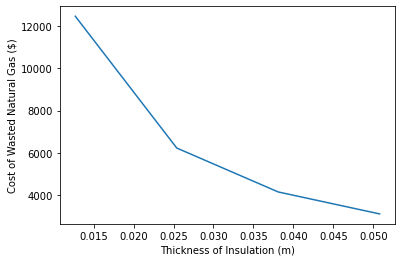

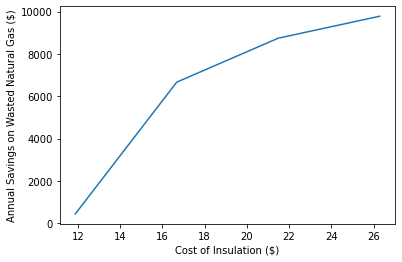

In [2]:
k = 0.23 #W/(m.K)
D = 0.1 #m
L = 25. #m
T_pipe = 150. #C
T_amb = 25. #C
A = np.pi*D*L #m^2
eta = 0.9 #efficiency
C_no_insulation = (((18405*31536000)/eta)/1000000)*0.02 #cost of wasted energy with no insulation
L_insulation = [0.0127, 0.0254, 0.0381, 0.0508]
C_insulation = [(25./0.914)*13.84*L_insulation[0]+7.06, (25./0.914)*13.84*L_insulation[1]+7.06, (25./0.914)*13.84*L_insulation[2]+7.06, (25./0.914)*13.84*L_insulation[3]+7.06]
q_loss = [-k*A*((T_amb-T_pipe)/(L_insulation[0])), -k*A*((T_amb-T_pipe)/(L_insulation[1])), -k*A*((T_amb-T_pipe)/(L_insulation[2])), -k*A*((T_amb-T_pipe)/(L_insulation[3]))]
C_furnace = [(((q_loss[0]*31536000)/eta)/1000000)*0.02, (((q_loss[1]*31536000)/eta)/1000000)*0.02, (((q_loss[2]*31536000)/eta)/1000000)*0.02, (((q_loss[3]*31536000)/eta)/1000000)*0.02]
C_savings = [C_no_insulation-C_furnace[0], C_no_insulation-C_furnace[1], C_no_insulation-C_furnace[2], C_no_insulation-C_furnace[3]]

plot1 = plt.figure(1)
plt.plot(L_insulation, C_furnace)
plt.xlabel('Thickness of Insulation (m)')
plt.ylabel('Cost of Wasted Natural Gas ($)')

plot2 = plt.figure(2)
plt.plot(C_insulation, C_savings)
plt.xlabel('Cost of Insulation ($)')
plt.ylabel('Annual Savings on Wasted Natural Gas ($)')

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
* Heat transfer is steady and 1D
* Radiation is neglagible
* Conservation of Energy is applied to the system
* There is no energy generation in the control volume

Heat Transfer Rate
$$
q=\frac{T_{in}-T_{out}}{R_{total}}
$$

Resitance for single pane window
$$
R_{total,single}=R_{conv,in}+R_{cond,glass}+R_{conv,out} \\
R_{conv,in}=\frac{1}{h_{in}A} \\
R_{cond,glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{conv,out}=\frac{1}{h_{out}A} \\
R_{total,single}=\frac{1}{A}(\frac{1}{h_{in}}+\frac{t_{glass}}{k_{glass}}+\frac{1}{h_{out}})
$$

Resitance for single pane window with storm window
$$
R_{total,single}=R_{conv,in}+R_{cond,glass}+R_{conv,storm}+R_{cond,glass}+R_{conv,out} \\
R_{conv,in}=\frac{1}{h_{in}A} \\
R_{cond,glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{conv,storm}=\frac{1}{h_{storm}A}\\
R_{conv,out}=\frac{1}{h_{out}A} \\
R_{total,single}=\frac{1}{A}(\frac{1}{h_{in}}+\frac{t_{glass}}{k_{glass}}+\frac{1}{h_{storm}}+\frac{t_{glass}}{k_{glass}}+\frac{1}{h_{out}})
$$

Resitance for a double pane window
$$
R_{total,double}=R_{conv,in}+R_{cond,glass}+R_{cond,space}+R_{cond,glass}+R_{conv,out} \\
R_{conv,in}=\frac{1}{h_{in}A} \\
R_{cond,glass}=\frac{t_{glass}}{k_{glass}A} \\
R_{cond,space}=\frac{t_{space}}{k_{space}A} \\
R_{conv,out}=\frac{1}{h_{out}A} \\
R_{total,double}=\frac{1}{A}(\frac{1}{h_{in}}+\frac{t_{glass}}{k_{glass}}+\frac{t_{space}}{k_{space}}+\frac{t_{glass}}{k_{glass}}+\frac{1}{h_{out}})
$$

In [3]:
T_in = 21. #C
T_out = 0. #C
height = 1.5 #m
width = 1. #m
A = height*width #m^2
h_in = 8.29 #W/m^2.C
h_out = 34 #W/m^2.C
h_storm = 19 #W/m^2.C
t_glass = 0.003 #m
t_space = 0.005 #m
k_glass = 0.92 #W/m.C
k_space = 0.003 #W/m.C
R_conv_in = 1/(h_in*A) #C/W
R_conv_out = 1/(h_out*A) #C/W
R_cond_glass = t_glass/(k_glass*A) #C/W
R_conv_storm = 1/(h_storm*A) #C/W
R_cond_space = t_space/(k_space*A) #C/W
R_single = R_conv_in+R_cond_glass+R_conv_out #C/W
R_storm = R_conv_in+R_cond_glass+R_conv_storm+R_cond_glass+R_conv_out #C/W
R_double = R_conv_in+R_cond_glass+R_cond_space+R_cond_glass+R_conv_out #C/W
q_single = (T_in-T_out)/R_single #W
q_storm = (T_in-T_out)/R_storm #W
q_double = (T_in-T_out)/R_double #W

print('The rate of heat transfer for the single pane window is %0.2fW' %q_single)
print('The rate of heat transfer for the single pane with storm window is %0.2fW' %q_storm)
print('The rate of heat transfer for the double pane window is %0.2fW' %q_double)


The rate of heat transfer for the single pane window is 205.48W
The rate of heat transfer for the single pane with storm window is 150.58W
The rate of heat transfer for the double pane window is 17.28W
